**WAIT!! DONT RUN ALL YET!**

**Note**: To reduce runtime from nearly an hour to about 5 minutes, some model outputs are saved in pickled files. We had difficulty linking pickled models to notebook directly through github as colab has a bug with unzipping zip files that have been downloaded from other sources. To get the pickled model data, run the following code:

In [ ]:
#!wget https://github.com/odibo1/DATA_602/blob/main/Pickle_Files.zip

--2021-05-19 00:58:31--  https://github.com/odibo1/DATA_602/blob/main/Pickle_Files.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Pickle_Files.zip.1’

Pickle_Files.zip.1      [ <=>                ] 109.88K  --.-KB/s    in 0.004s  

2021-05-19 00:58:32 (25.6 MB/s) - ‘Pickle_Files.zip.1’ saved [112520]



Then download the zipped file to local computer. Delete the zipped file from colab directory, and then reupload the zipped file from your local computer. From then, the entire notebook can be run with the previous cell commented out

To create the pickled file folder, simply run the notebook without any commented codes in Section 2 and save the resulting files in a folder manually

# **Final Project: Estimating Credit Risk of Individuals**
Tchuissi Mbu Nyamsi, Seun Odibo, Adam Afilaka

# **Problem Statement**

A functional economy is built on the availability of financing for business and personal activity. However, banks need to consider the possibility that individuals may not make credit payments at agreed upon times.

**How can we predict the risk of defaulting on payments for new credit card applicants?**


## **I/ Data cleaning and preprocessing**

### **1.1 Read and merge the data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [ ]:
# Read the first dataset that will be our features

application = pd.read_csv("https://drive.google.com/uc?export=download&id=1_C4bj1-e_cMdwuogiCA10Bm3SzgSvKQd")
application.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
# how many unique ID in application record?
len(set(application['ID']))

438510

In [ ]:
# Read the second dataset. The status column will represent our targets

credit = pd.read_csv('https://drive.google.com/uc?export=download&id=1i3BwCpxWIGY4-7dszaEe2H33WBFlzqBp')
credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [ ]:
# how many unique ID in credit record?
len(set(credit['ID'])) 

45985

In [ ]:
# how many IDs do two tables share?

len(set(application['ID']).intersection(set(credit['ID']))) 

36457

In [ ]:
# Combining the two files
                        
final= pd.merge(credit,application, on ='ID')
final.head()  

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,0,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008804,-1,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008804,-2,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
3,5008804,-3,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
4,5008804,-4,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0


In [ ]:
# how many unique ID in final?
len(set(final['ID']))

36457

In [ ]:
final.shape

(777715, 20)

In [ ]:
final.dtypes

ID                       int64
MONTHS_BALANCE           int64
STATUS                  object
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

There are 36457 customers in both datasets analyzed over several months. Only those customers can be judge for judgment


### **1.2 Rename and delete columns**

In [ ]:
final=final.rename(columns={'CODE_GENDER': 'Gender',
                   'FLAG_OWN_CAR': 'Car',
                   'FLAG_OWN_REALTY':'Property',
                   'CNT_CHILDREN': 'ChildNo',
                   'AMT_INCOME_TOTAL':'Income',
                   'NAME_INCOME_TYPE': 'Income_type',
                   'NAME_EDUCATION_TYPE': 'Education_level',
                   'NAME_FAMILY_STATUS': 'Family_status',
                   'NAME_HOUSING_TYPE' : 'Housing_type',
                   'DAYS_BIRTH': 'Age',
                   'DAYS_EMPLOYED': 'Years_employed',
                   'OCCUPATION_TYPE':'Occupation',
                   'CNT_FAM_MEMBERS': 'Family_size',
                   'MONTHS_BALANCE': 'Month_balance',
                   'STATUS': "Status"    
                           })

final.head()

,ID,Month_balance,Status,Gender,Car,Property,ChildNo,Income,Income_type,Education_level,Family_status,Housing_type,Age,Years_employed,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,Occupation,Family_size
0,5008804,0,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008804,-1,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008804,-2,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
3,5008804,-3,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
4,5008804,-4,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0


In [ ]:
final.Age = final.Age.div(365)*(-1)



In [ ]:
final.Age = final.Age.round()

In [ ]:
final.Years_employed = final.Years_employed.div(365)*(-1)
final.Years_employed = final.Years_employed.round()

In [ ]:
final.head()

,ID,Month_balance,Status,Gender,Car,Property,ChildNo,Income,Income_type,Education_level,Family_status,Housing_type,Age,Years_employed,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,Occupation,Family_size
0,5008804,0,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,1,1,0,0,NaN,2.0
1,5008804,-1,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,1,1,0,0,NaN,2.0
2,5008804,-2,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,1,1,0,0,NaN,2.0
3,5008804,-3,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,1,1,0,0,NaN,2.0
4,5008804,-4,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,1,1,0,0,NaN,2.0


In [ ]:
# We drop phone and email columns

final =final.drop(['FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL','Month_balance'], axis=1)


We dropped phone and email columns because they are irrelevant for our analysis

In [ ]:
final.head()

,ID,Status,Gender,Car,Property,ChildNo,Income,Income_type,Education_level,Family_status,Housing_type,Age,Years_employed,Occupation,Family_size
0,5008804,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,NaN,2.0
1,5008804,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,NaN,2.0
2,5008804,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,NaN,2.0
3,5008804,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,NaN,2.0
4,5008804,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,NaN,2.0


### **1.3 Rename and group the labels in 3 classes**


In [ ]:
final['Status'].value_counts()

C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: Status, dtype: int64

* Most of the clients paid their debt within the month 
* More than a third paid their debt the following month
* Almost one quarter don't have monthly loan (maybe they use only debit card?)
* Very few pay their debts after two months 

Conclusion: We will group the labels 1,2,3,4,5, into one label for our machine learning models

In [ ]:
# X--> 0 :no loan for the month
# C--> 1 :paid off that month
# 0,1,2,3,4,5 --> 2  : > 1 days past due

final['Status'] = final['Status'].replace(['X','C','0','1','2','3','4','5'],[0,1,2,2,2,2,2,2])
final.head()

,ID,Status,Gender,Car,Property,ChildNo,Income,Income_type,Education_level,Family_status,Housing_type,Age,Years_employed,Occupation,Family_size
0,5008804,1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,NaN,2.0
1,5008804,1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,NaN,2.0
2,5008804,1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,NaN,2.0
3,5008804,1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,NaN,2.0
4,5008804,1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,NaN,2.0


In [ ]:
final['Status'].value_counts()

1    329536
2    302229
0    145950
Name: Status, dtype: int64

In [ ]:
#groupby the data by statuts
Total_status = final.groupby("Status")["ID"].count()
Total_status

Status
0    145950
1    329536
2    302229
Name: ID, dtype: int64

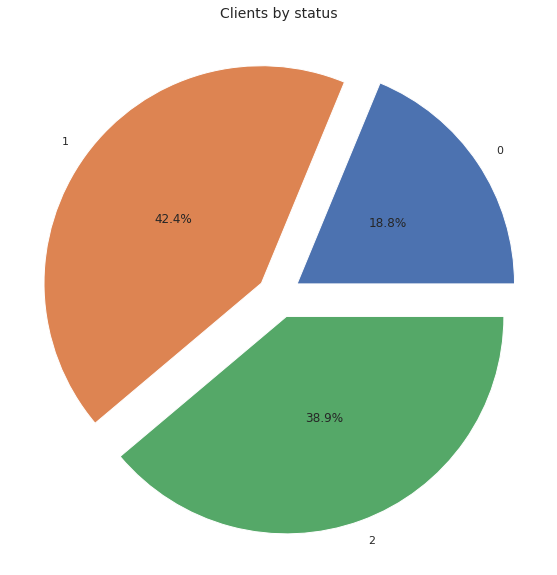

In [ ]:
#Using matplotlib
pie, ax = plt.subplots(figsize=[15,10])
labels = Total_status.keys()
plt.pie(x=Total_status, autopct="%.1f%%", explode=[0.1]*3, labels=labels, pctdistance=0.5)
plt.title("Clients by status", fontsize=14);
pie.savefig("Clients_by_status.png")

#plt.pie(x=Total_status, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)

### **1.4 Categorical data cleaning before encoding**

We cleaned the categorical data to facilitate the encoding.

We have three binary features: gender (M/F) , car and property (Y/N)
We clean three categorical data into binary features:
- Education level: higher or secondary
- Family status : married or single
- Housing type : house or apartment

We clean two categorical features to have only three classes.
- Income type: working, student or retired
- Occupation: low-skill, medium-skill or high-skill staff

In [ ]:
final.Income_type.unique()


array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

In [ ]:
final['Income_type'] = final['Income_type'].replace('Commercial associate','Working')
final['Income_type'] = final['Income_type'].replace('State servant','Working')
final['Income_type'] = final['Income_type'].replace('Pensioner','Retired')

In [ ]:
final.Education_level.unique()

array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [ ]:
final['Education_level'] = final['Education_level'].replace('Secondary / secondary special','Secondary')
final['Education_level'] = final['Education_level'].replace('Lower secondary','Secondary')
final['Education_level'] = final['Education_level'].replace('Incomplete higher','Secondary')
final['Education_level'] = final['Education_level'].replace('Higher education','Higher')
final['Education_level'] = final['Education_level'].replace('Academic degree','Higher')


In [ ]:
final.Family_status.unique()

array(['Civil marriage', 'Married', 'Single / not married', 'Separated',
       'Widow'], dtype=object)

In [ ]:
final['Family_status'] = final['Family_status'].replace('Single / not married','Single')
final['Family_status'] = final['Family_status'].replace('Separated','Single')
final['Family_status'] = final['Family_status'].replace('Civil marriage','Married')
final['Family_status'] = final['Family_status'].replace('Widow','Single')

In [ ]:
final.Housing_type.unique()

array(['Rented apartment', 'House / apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [ ]:
final['Housing_type'] = final['Housing_type'].replace('House / apartment','House')
final['Housing_type'] = final['Housing_type'].replace('With parents','House')
final['Housing_type'] = final['Housing_type'].replace('Rented apartment','Apartment')
final['Housing_type'] = final['Housing_type'].replace('Municipal apartment','Apartment')
final['Housing_type'] = final['Housing_type'].replace('Co-op apartment','Apartment')
final['Housing_type'] = final['Housing_type'].replace('Office apartment','Apartment')

In [ ]:
final.Occupation.unique()

array([nan, 'Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

In [ ]:
final['Occupation'] = final['Occupation'].replace('Security staff','Low-skill staff')
final['Occupation'] = final['Occupation'].replace('Laborers','Low-skill staff')
final['Occupation'] = final['Occupation'].replace('Drivers','Low-skill staff')
final['Occupation'] = final['Occupation'].replace('Cleaning staff','Low-skill staff')
final['Occupation'] = final['Occupation'].replace('Cooking staff','Low-skill staff')
final['Occupation'] = final['Occupation'].replace('Low-skill Laborers','Low-skill staff')
final['Occupation'] = final['Occupation'].replace('Waiters/barmen staff','Low-skill staff')
final['Occupation'] = final['Occupation'].replace('Core staff','Medium-skill staff')
final['Occupation'] = final['Occupation'].replace('Secretaries','Medium-skill staff')
final['Occupation'] = final['Occupation'].replace('HR staff','Medium-skill staff')
final['Occupation'] = final['Occupation'].replace('Realty agents','Medium-skill staff')
final['Occupation'] = final['Occupation'].replace('Sales staff','High-skill staff')
final['Occupation'] = final['Occupation'].replace('Accountants','High-skill staff')
final['Occupation'] = final['Occupation'].replace('Managers','High-skill staff')
final['Occupation'] = final['Occupation'].replace('High skill tech staff','High-skill staff')
final['Occupation'] = final['Occupation'].replace('IT staff','High-skill staff')
final['Occupation'] = final['Occupation'].replace('Medicine staff','High-skill staff')
final['Occupation'] = final['Occupation'].replace('Private service staff','High-skill staff')


### **1.5 Handling missing values**

In [ ]:
missing_values_count = final.isnull().sum()

In [ ]:
missing = final[final.isna().any(axis=1)]

In [ ]:
missing.isnull().sum()

ID                      0
Status                  0
Gender                  0
Car                     0
Property                0
ChildNo                 0
Income                  0
Income_type             0
Education_level         0
Family_status           0
Housing_type            0
Age                     0
Years_employed          0
Occupation         240048
Family_size             0
dtype: int64

In [ ]:
# percent of data that is missing
missing.shape[0]/final.shape[0]

0.30865805597166057

In [ ]:
# remove all the rows that contain a missing value
final = final.dropna()

#or

# replace all NA's with 0
#subset_nfl_data.fillna(0)

In [ ]:
final['Status'].value_counts()

1    226185
2    209315
0    102167
Name: Status, dtype: int64

In [ ]:
#groupby the data by statuts
Total_status = final.groupby("Status")["ID"].count()
Total_status

Status
0    102167
1    226185
2    209315
Name: ID, dtype: int64

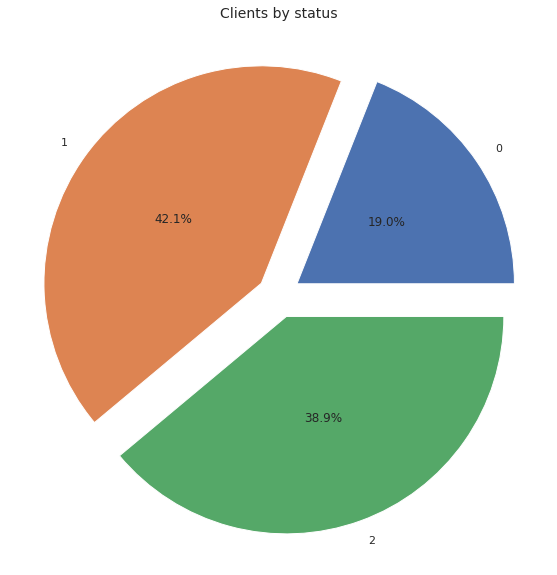

In [ ]:
#Using matplotlib
pie, ax = plt.subplots(figsize=[15,10])
labels = Total_status.keys()
plt.pie(x=Total_status, autopct="%.1f%%", explode=[0.1]*3, labels=labels, pctdistance=0.5)
plt.title("Clients by status", fontsize=14);
pie.savefig("Clients_by_status.png")

#plt.pie(x=Total_status, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)

Removing the missing values do not change the proportion of the class labels

### **1.6 Stratified random sampling**




The goal is to keep the same proportions of class labels as the original to test our model with different sample size

In [ ]:
# Code : https://www.statology.org/stratified-sampling-pandas/
#define total sample size desired
N = 5000

#perform stratified random sampling
sample_final=final.groupby('Status', group_keys=False).apply(lambda x: x.sample(int(np.rint(N*len(x)/len(final))))).sample(frac=1, replace=True).reset_index(drop=True)

In [ ]:
sample_final.shape

(5000, 15)

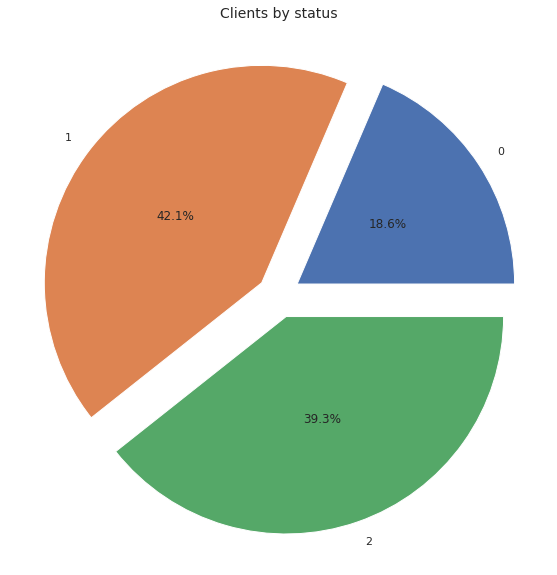

In [ ]:
#groupby the data by statuts
Total_status = sample_final.groupby("Status")["ID"].count()
Total_status

#Using matplotlib
pie, ax = plt.subplots(figsize=[15,10])
labels = Total_status.keys()
plt.pie(x=Total_status, autopct="%.1f%%", explode=[0.1]*3, labels=labels, pctdistance=0.5)
plt.title("Clients by status", fontsize=14);
pie.savefig("Clients_by_status.png")

#plt.pie(x=Total_status, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)

The proportions are the same as the original regardless the sample size

### **1.8 Correlation matrix**

We want to evaluate the correlation between variables

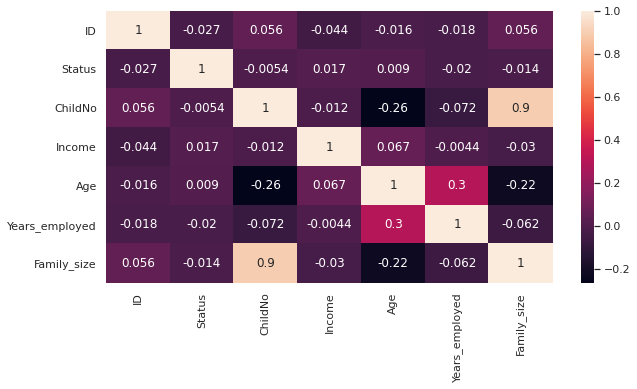

In [ ]:
corr_matrix = sample_final.corr()
# Plot the correlation with seaborn
plt.subplots(figsize = (10, 5))
sns.heatmap(corr_matrix, annot = True)
plt.show()

Overall, the features are not that correlated between each other. The highest result is with the age and the number of children and with the family size, which makes sense.

### **1.9 Creation of an Excel file (optional)**


In [ ]:
 #!pip install openpyxl

In [ ]:
# create excel writer object

#writer = pd.ExcelWriter('output.xlsx')
# write dataframe to excel

#final.to_excel(writer)
# save the excel

#writer.save()
#print('DataFrame is written successfully to Excel File.')

## **II/ Machine Learning**


### **2.1 Split dataset**
#### Dataset is split to maintain label distibution in training and test sets


In [ ]:
from sklearn.model_selection import train_test_split

X, y = sample_final.iloc[:, 2:].values, sample_final.iloc[:, 1].values  #the status column is on the third position
#y = y.astype('int')
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.2,random_state=1,stratify=y)
    

### **2.2 Encode categorical variables for processing**



In [ ]:
#need to convert array to dataframe with column names for column transform to work
X_train_df = pd.DataFrame(X_train)
X_train_df.columns = sample_final.iloc[:, 2:].columns
X_train_df = pd.get_dummies(X_train_df, drop_first=True,
                            columns = ['Gender', 'Car','Property','Education_level','Family_status','Housing_type','Income_type','Occupation'] )


### **2.3 Select Algorithm with Nested Cross Validation**

Use GridSearch and CrossValidation to determine optimum parameters of each model and compare accuracy scores to choose the best algorithm



**2.3.1 Logistic Regression**

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(max_iter=10000))

#create dictionary of parameters for grid searching
C = np.logspace(-4, 4, 50)
parameters = dict(logisticregression__C=C)

gs_lr = GridSearchCV(pipe_lr, parameters, cv=2)

scores_lr = cross_val_score(gs_lr, X_train_df, y_train, cv = 5)

print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores_lr),
                                      np.std(scores_lr)))



CV accuracy: 0.428 +/- 0.010


In [ ]:
#view best regularization parameter
gs_lr_fit = gs_lr.fit(X_train_df, y_train)

print(gs_lr_fit.best_params_)

{'logisticregression__C': 0.0006551285568595509}


**2.3.2 Random Forest; nested cross validation takes too long to run, so the optimized model has been saved using pickle**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs = -1)

max_depth = [1,2,3,4,5,None]
n_estimators = np.linspace(50,500,10,dtype=int)


parameters = dict(max_depth=max_depth, n_estimators = n_estimators)

gs_rfc = GridSearchCV(rfc, parameters, cv=2)

#scores_rfc = cross_val_score(gs_rfc, X_train_df, y_train, cv = 5)


In [ ]:
#gs_rfc_fit = gs_rfc.fit(X_train_df, y_train)

#print(gs_rfc_fit.best_params_)

Saved optimized parameters

In [ ]:
#saves model results in a file
import pickle 

#with open('model_params', 'wb') as f:
#  pickle.dump(gs_rfc_fit, f)

In [ ]:
#unzip file containing model results
!unzip /Pickle_Files.zip

unzip:  cannot find or open /Pickle_Files.zip, /Pickle_Files.zip.zip or /Pickle_Files.zip.ZIP.


In [ ]:
with open('Pickle_Files/model_params', 'rb') as f:
  rfc_params = pickle.load(f)

FileNotFoundError: ignored

In [ ]:
rfc_params.best_params_

Save cross validation results to file

In [ ]:
#with open('rfc_pickle', 'wb') as f:
#  pickle.dump(scores_rfc, f)

In [ ]:
with open('Pickle_Files/rfc_pickle', 'rb') as f:
  rfc_model = pickle.load(f)

In [ ]:
print('CV accuracy: %.3f +/- %.3f' % (np.mean(rfc_model),
                                      np.std(rfc_model)))

**2.3.3 Support Vector Classification**

In [ ]:
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))

param_range = [0.01, 0.1, 1.0, 10.0]

param_grid = [{'svc__C': param_range,
               'svc__kernel': ['linear']},
              {'svc__C': param_range,
               'svc__gamma': param_range,
               'svc__kernel': ['rbf']}]

gs_svc = GridSearchCV(estimator=pipe_svc,param_grid=param_grid,
                  cv=2,
                  n_jobs=-1)

scores_svc = cross_val_score(gs_svc, X_train_df, y_train, cv = 5)

print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores_svc),
                                      np.std(scores_svc)))


In [ ]:
gs_svc_fit = gs_svc.fit(X_train_df, y_train)

print(gs_svc_fit.best_params_)

Though all three models performed relatively poorly, further analysis will only focus on the Support Vector Classifier and the Random Forest Classifier, both scoring at about 66% accuracy

###**2.4 Learning Curves**

We will now investigate the poor performance to see if we can improve the accuracy

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


forest = RandomForestClassifier(n_estimators=250,
                                random_state=1)

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=forest,
                               X=X_train_df,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=5,
                               n_jobs=-1)
                

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.title('Learning Curve - Random Forest Classifier')
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.ylim([0.3, 1.03])
plt.tight_layout()
# plt.savefig('images/06_05.png', dpi=300)
plt.show()

In [ ]:
pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1, C=10, gamma=10, kernel='rbf'))

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_svc,
                               X=X_train_df,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=5,
                               n_jobs=-1)
                

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.title('Learning Curve - Support Vector Classifier')
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.ylim([0.3, 1.03])
plt.tight_layout()
# plt.savefig('images/06_05.png', dpi=300)
plt.show()

From the learning curves, we can see that the models are overfitting. The models may benefit from a simpler model, some feature reduction, and also from more samples

###**2.5 Feature Selection**
Rascha chap 4

This section tries to improve our models' performance by the following feature reduction processes:



1.   Random forest feature reduction
2.   Principal Component Analysis (PCA)
3.   Linear Discriminant Analysis (LDA)
4.   Kernel Principal Component Analysis (KPCA)



In [ ]:
feat_labels = X_train_df.columns

forest = RandomForestClassifier(n_estimators=250,
                                random_state=1)

forest.fit(X_train_df, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train_df.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train_df.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train_df.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train_df.shape[1]])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()

In [ ]:
stdsc = StandardScaler()

X_train_std = stdsc.fit_transform(X_train_df)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 

lda = LDA(n_components=None)

X_train_lda = lda.fit_transform(X_train_std, y_train)

EXP_VAR_LDA = lda.explained_variance_ratio_

In [ ]:
indices = np.argsort(EXP_VAR_LDA)[::-1]

plt.title('Explained Variance Ratio - LDA')
plt.bar(range(X_train_lda.shape[1]), 
        EXP_VAR_LDA[indices],
        align='center')

plt.xticks(range(X_train_lda.shape[1]), 
           list(range(1,len(EXP_VAR_LDA)+1)))
plt.xlim([-1, X_train_lda.shape[1]])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)

pca_3 = PCA(n_components=3)

X_train_pca = pca.fit_transform(X_train_std)

X_train_pca_3 = pca_3.fit_transform(X_train_std)

EXP_VAR = pca.explained_variance_ratio_

In [ ]:
indices = np.argsort(EXP_VAR)[::-1]

plt.title('PCA Explained Variance Ratio')
plt.bar(range(X_train_pca.shape[1]), 
        EXP_VAR[indices],
        align='center')

plt.xticks(range(X_train_pca.shape[1]), 
           list(range(1,len(EXP_VAR))))
plt.xlim([-1, X_train_pca.shape[1]])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()

In [ ]:
from sklearn.decomposition import KernelPCA

scikit_kpca = KernelPCA(n_components=3, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X_train_std)


**2.5.1 Estimate model with 3 most important features**

In [ ]:
X_train_3 = X_train_df[['Age','Income','Years_employed']]

In [ ]:
pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1, C=10.0, gamma= 10.0, kernel='rbf'))

scores_svc_3 = cross_val_score(pipe_svc, X_train_3, y_train, cv=5)

print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores_svc_3),
                                      np.std(scores_svc_3)))

In [ ]:
forest = RandomForestClassifier(n_estimators=250,
                                max_depth=None,
                                random_state=1)

scores_rfc_3 = cross_val_score(forest, X_train_3, y_train, cv = 5)

print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores_rfc_3),
                                      np.std(scores_rfc_3)))


**2.5.2 Estimate models with PCA**

In [ ]:
scores_svc_pca = cross_val_score(pipe_svc, X_train_pca_3, y_train, cv = 5)

print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores_svc_pca),
                                      np.std(scores_svc_pca)))

In [ ]:
scores_rfc_pca = cross_val_score(forest, X_train_pca_3, y_train, cv = 5)

print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores_rfc_pca),
                                      np.std(scores_rfc_pca)))

**2.5.3 Estimate models with LDA**

In [ ]:
scores_svc_lda = cross_val_score(pipe_svc, X_train_lda, y_train, cv = 5)

print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores_svc_lda),
                                      np.std(scores_svc_lda)))

In [ ]:
scores_rfc_lda = cross_val_score(forest, X_train_lda, y_train, cv = 5)

print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores_rfc_lda),
                                      np.std(scores_rfc_lda)))

**2.5.4 Estimate models with KPCA**

In [ ]:
scores_svc_kcpa = cross_val_score(pipe_svc, X_skernpca, y_train, cv = 5)

print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores_svc_kcpa),
                                      np.std(scores_svc_kcpa)))

In [ ]:
scores_svc_kcpa = cross_val_score(forest, X_skernpca, y_train, cv = 5)

print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores_svc_kcpa),
                                      np.std(scores_svc_kcpa)))

From these accuracy scores, we see that the feature selection methods do not improve the performance of the model

###**2.6 Increasing sample size**

Next, we try increasing the sample size to see if that improves the accuracy of models. We increase the sample size to 35000. Because of the large sample size, we store the results of the learning curve in a file using pickle

In [ ]:
# Code : https://www.statology.org/stratified-sampling-pandas/
#define total sample size desired
N = 35000

#perform stratified random sampling
sample_final_2=final.groupby('Status', group_keys=False).apply(lambda x: x.sample(int(np.rint(N*len(x)/len(final))))).sample(frac=1, replace=True).reset_index(drop=True)

In [ ]:
X, y = sample_final_2.iloc[:, 2:].values, sample_final_2.iloc[:, 1].values  

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.2,random_state=1,stratify=y)
    

In [ ]:
X_train_df = pd.DataFrame(X_train)
X_train_df.columns = sample_final.iloc[:, 2:].columns
X_train_df = pd.get_dummies(X_train_df, drop_first=True,
                            columns = ['Gender', 'Car','Property','Education_level','Family_status','Housing_type','Income_type','Occupation'] )

In [ ]:
forest = RandomForestClassifier(n_estimators=250,
                                random_state=1)

scores_rfc_2 = cross_val_score(forest, X_train_df, y_train, cv = 5)

print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores_rfc_2),
                                      np.std(scores_rfc_2)))

In [ ]:
#train_sizes, train_scores, test_scores =\
#                learning_curve(estimator=forest,
#                               X=X_train_df,
#                               y=y_train,
#                               train_sizes=np.linspace(0.1, 1.0, 10),
#                               cv=5,
#                               n_jobs=-1)
                

In [ ]:
#with open('train_sizes_2', 'wb') as f:
#  pickle.dump(train_sizes, f)

#with open('train_scores_2', 'wb') as f:
#  pickle.dump(train_scores, f)

#with open('test_scores_2', 'wb') as f:
#  pickle.dump(test_scores, f)

In [ ]:
with open('Pickle_Files/train_sizes_2', 'rb') as f:
  train_sizes = pickle.load(f)

with open('Pickle_Files/train_scores_2', 'rb') as f:
  train_scores = pickle.load(f)

with open('Pickle_Files/test_scores_2', 'rb') as f:
  test_scores = pickle.load(f)

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.title('Learning Curve - Random Forest Classifier')
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.ylim([0.3, 1.03])
plt.tight_layout()
# plt.savefig('images/06_05.png', dpi=300)
plt.show()

In [ ]:
#pipe_svc = make_pipeline(StandardScaler(),
#                         SVC(random_state=1, C=10, gamma=10, kernel='rbf'))

#scores_svc_2 = cross_val_score(pipe_svc, X_train_df, y_train, cv = 5)

#print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores_svc_2),
#                                      np.std(scores_svc_2)))

In [ ]:
#with open('svc_pickle_2', 'wb') as f:
#  pickle.dump(scores_svc_2, f)

In [ ]:
with open('Pickle_Files/svc_pickle_2', 'rb') as f:
  svc_scores_2 = pickle.load(f)

In [ ]:
print('CV accuracy: %.3f +/- %.3f' % (np.mean(svc_scores_2),
                                      np.std(svc_scores_2)))

In [ ]:
#train_sizes, train_scores, test_scores =\
#                learning_curve(estimator=pipe_svc,
#                               X=X_train_df,
#                               y=y_train,
#                               train_sizes=np.linspace(0.1, 1.0, 10),
#                               cv=5,
#                               n_jobs=-1)
                

In [ ]:
#with open('train_sizes_3', 'wb') as f:
#  pickle.dump(train_sizes, f)

#with open('train_scores_3', 'wb') as f:
#  pickle.dump(train_scores, f)

#with open('test_scores_3', 'wb') as f:
#  pickle.dump(test_scores, f)

In [ ]:
with open('Pickle_Files/train_sizes_3', 'rb') as f:
  train_sizes = pickle.load(f)

with open('Pickle_Files/train_scores_3', 'rb') as f:
  train_scores = pickle.load(f)

with open('Pickle_Files/test_scores_3', 'rb') as f:
  test_scores = pickle.load(f)

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.title('Learning Curve - Support Vector Classifier')
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.ylim([0.3, 1.03])
plt.tight_layout()
# plt.savefig('images/06_05.png', dpi=300)
plt.show()

From this analysis, we see that increasing the sample size does not increase the performance. The training and validation scores converge to about the same accuracy score of 63%

###**2.7 Predicting labels on test set and visualizing results**

We will analyze the results of the model using the test data set and visualizations such as a Confusion Matrix and a visualization of the random forest

In [ ]:
#replicating column transformations for test dataset
X_test_df = pd.DataFrame(X_test)
X_test_df.columns = sample_final.iloc[:, 2:].columns
X_test_df = pd.get_dummies(X_test_df, drop_first=True,
                            columns = ['Gender', 'Car','Property','Education_level','Family_status','Housing_type','Income_type','Occupation'] )


In [ ]:
from sklearn.metrics import accuracy_score

forest.fit(X_train_df,y_train)

y_pred = forest.predict(X_test_df)

accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

print(confmat)

In [ ]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[0]):
    ax.text(x=j, y=i,
            s=confmat[i,j],
            va='center',ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

###**2.8 Visualize Random Forest and Individual Decision Tree**
source: https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c

In [ ]:
forest_3 = RandomForestClassifier(max_depth=None, n_estimators=250,
                                random_state=1)

forest_3.fit(X_train_df,y_train)

estimator_limited = forest.estimators_[5]

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(estimator_limited, out_file='tree_limited.dot', feature_names = X_train_df.columns,
                class_names = ['No Loans', 'Paid-off' , '1-29 days past due', '>30 days past due'],
                rounded = True, proportion = False, precision = 2, filled = True)

In [ ]:
!dot -Tpng tree_limited.dot -o tree_limited.png

In [ ]:
from IPython.display import Image
Image(filename = 'tree_limited.png')

## **III/ Conclusion and lessons learned**

- Data cleaning and pre-processing is paramount to effectively apply machine learning model
- Choosing between encoding methods for categorical data is challenging because it adds more columns than the original datasets(get_dummies, one-hot encoding)  
- We learn the importance of downsizing our dataset to shorten code runtime
- Models performed poorly, even after fine-tuning and feature reduction
Learning curve suggests overfitting
- Most features were categorical. The three most important features were the only non-categorical features, except for number of children, which has a limited range of values 
- Complexity did not seem to be the issue since performance reduced when only three features were used
- More relevant features with more variation may be considered for better performance
- A larger range of models could also be considered for better performance
